In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/Wetlab/haemocytometer') + os.sep

In [6]:
data_37C = pd.read_excel(data_dir + '20210506_lysis_tests.xlsx', sheet_name='37C_z1p5_g3').fillna(0)

In [15]:
data_37C

,time,Dilution,Normal,Dark,Burst,Normal.1,Dark.1,Burst.1,Normal.2,Dark.2,...,Normal.3,Dark.3,Burst.3,Normal Mean,Normal STD,Dark Mean,Dark Var,Burst Mean,Burst Var,Total Cells
0,0,15,122,0.0,0.0,122,1,0.0,104,0.0,...,144,0.0,0.0,18450000,2.455606e+06,37500,0.000000e+00,37500,0.000000e+00,18487500
1,11,15,4,57.0,12.0,19,70,4.0,8,88.0,...,9,88.0,3.0,1500000,9.565563e+05,11362500,2.266192e+06,1050000,6.363961e+05,12862500
2,29,15,23,35.0,22.0,10,43,25.0,17,61.0,...,8,65.0,15.0,2175000,1.028348e+06,7650000,2.149419e+06,2662500,1.077323e+06,9825000


(0.0, 20000000.0)

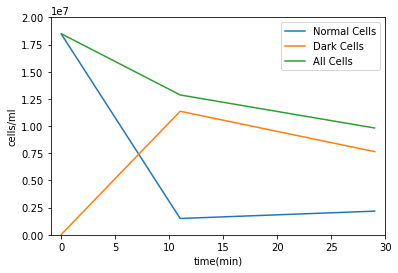

In [33]:
fig, ax = plt.subplots(1,1)

ax.plot(data_37C['time'], data_37C['Normal Mean'], label='Normal Cells')
ax.plot(data_37C['time'], data_37C['Dark Mean'], label='Dark Cells')
ax.plot(data_37C['time'], data_37C['Dark Mean'] + data_37C['Normal Mean'], label='All Cells')
ax.legend()
ax.set_xlabel('time(min)')
ax.set_ylabel('cells/ml')
ax.set_xlim(-1,30)
ax.set_ylim(0,2.0e7)

In [34]:
data_25C = pd.read_excel(data_dir + '20210506_lysis_tests.xlsx', sheet_name='25C_z1p5_g3').fillna(0)

(0.0, 20000000.0)

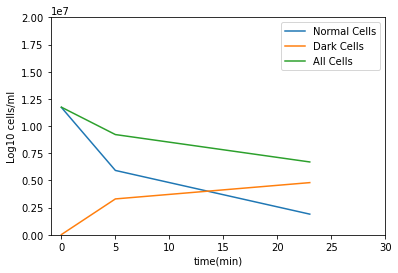

In [36]:
fig, ax = plt.subplots(1,1)

ax.plot(data_25C['time'], data_25C['Normal Mean'], label='Normal Cells')
ax.plot(data_25C['time'], data_25C['Dark Mean'], label='Dark Cells')
ax.plot(data_25C['time'], data_25C['Dark Mean'] + data_25C['Normal Mean'], label='All Cells')
ax.legend()
ax.set_xlabel('time(min)')
ax.set_ylabel('Log10 cells/ml')
ax.set_xlim(-1,30)
ax.set_ylim(0,2.0e7)

In [41]:
data = pd.read_excel(data_dir + '20210506_lysis_tests.xlsx', sheet_name='25C_z1p5_g1').fillna(0)

(0.0, 20000000.0)

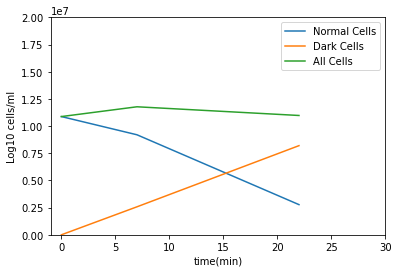

In [43]:
fig, ax = plt.subplots(1,1)

ax.plot(data['time'], data['Normal Mean'], label='Normal Cells')
ax.plot(data['time'], data['Dark Mean'], label='Dark Cells')
ax.plot(data['time'], data['Dark Mean'] + data['Normal Mean'], label='All Cells')
ax.legend()
ax.set_xlabel('time(min)')
ax.set_ylabel('Log10 cells/ml')
ax.set_xlim(-1,30)
ax.set_ylim(0,2.0e7)

In [60]:
data_heat = pd.read_excel(data_dir + '20210506_lysis_tests.xlsx', sheet_name='heat_test').fillna(0)

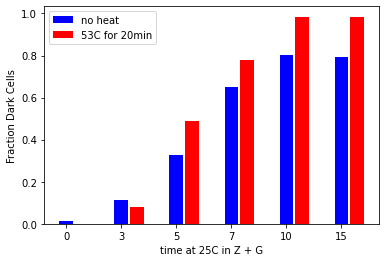

In [78]:
fig, ax = plt.subplots(1,1)

data_sets = {}

data_sets['pre'] = data_heat[data_heat['53C_20min']=='no']
data_sets['pre'].set_index('time_removed', inplace=True)

data_sets['post'] = data_heat[data_heat['53C_20min']=='yes']
data_sets['post'].set_index('time_removed', inplace=True)

times = [0,3,5,7,10,15]

#offset, color
params = {'pre':(0,'b', 'no heat'), 'post': (0.28,'r', '53C for 20min')}
bw = 0.25



inds = {}
vals = {}

for cond in ['pre', 'post']:
    data_set = data_sets[cond]
    offset, color, label = params[cond]

    inds[cond] = []
    vals[cond] = []
    for jj, time in enumerate(times): 
        inds[cond].append(jj + offset)
        if (cond=='post') & (time==0):
            vals[cond].append(0)
        else: 
            vals[cond].append(data_set.loc[time, 'Dark/Total'])

    ax.bar(inds[cond], vals[cond], width= bw, color = color, label = label)

ax.set_xticks(np.arange(0,6))
ax.set_xticklabels(times)
ax.set_xlabel('time at 25C in Z + G')
ax.set_ylabel('Fraction Dark Cells')
ax.legend()

    

In [81]:
data_set['Normal Mean']
data_set['Dark Mean']

time_removed
3      600000
5     3575000
7     4350000
10    6175000
15    3150000
Name: Dark Mean, dtype: int64

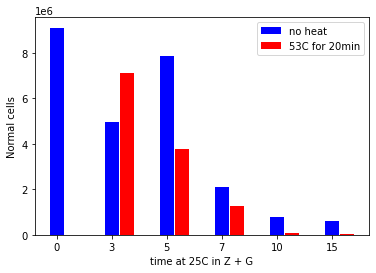

In [84]:
fig, ax = plt.subplots(1,1)

data_sets = {}

data_sets['pre'] = data_heat[data_heat['53C_20min']=='no']
data_sets['pre'].set_index('time_removed', inplace=True)

data_sets['post'] = data_heat[data_heat['53C_20min']=='yes']
data_sets['post'].set_index('time_removed', inplace=True)

times = [0,3,5,7,10,15]

#offset, color
params = {'pre':(0,'b', 'no heat'), 'post': (0.28,'r', '53C for 20min')}
bw = 0.25



inds = {}
vals = {}

for cond in ['pre', 'post']:
    data_set = data_sets[cond]
    offset, color, label = params[cond]

    inds[cond] = []
    vals[cond] = []
    for jj, time in enumerate(times): 
        inds[cond].append(jj + offset)
        if (cond=='post') & (time==0):
            vals[cond].append(0)
        else: 
            vals[cond].append(data_set.loc[time, 'Normal Mean'])

    ax.bar(inds[cond], vals[cond], width= bw, color = color, label = label)

ax.set_xticks(np.arange(0,6))
ax.set_xticklabels(times)
ax.set_xlabel('time at 25C in Z + G')
ax.set_ylabel('Normal cells')
ax.legend()


In [73]:
ax.set_xticklabels?
#np.arange(0,6)

Signature: ax.set_xticklabels(labels, *, fontdict=None, minor=False, **kwargs)
Docstring:
Set the xaxis' labels with list of string labels.

.. warning::
    This method should only be used after fixing the tick positions
    using `.Axes.set_xticks`. Otherwise, the labels may end up in
    unexpected positions.

Parameters
----------
labels : list of str
    The label texts.

fontdict : dict, optional
    A dictionary controlling the appearance of the ticklabels.
    The default *fontdict* is::

       {'fontsize': rcParams['axes.titlesize'],
        'fontweight': rcParams['axes.titleweight'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

minor : bool, default: False
    Whether to set the minor ticklabels rather than the major ones.

Returns
-------
list of `~.Text`
    The labels.

Other Parameters
----------------
**kwargs : `~.text.Text` properties.
File:      c:\users\heineib\anaconda3\envs\sc_seq_py\lib\site-packages\matplotlib\axes\_base.py
Type:

In [62]:

data_heat.loc[3, 'Dark/Total']

0.32905982905982906